#**EXAMPLE**
y_true = [3, 5, 2.5, 7]
,y_pred = [2.5, 5.0, 4.0, 8]
 Calculate the quantities MSE, MAE, MAPE, RMSE.
 Explain when we use MAPE?

Evaluate regression model performance
using common error metrics:
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- MAPE (Mean Absolute Percentage Error)


### 🔹 Mean Absolute Percentage Error (MAPE)

**Definition:**
The **Mean Absolute Percentage Error (MAPE)** measures the average percentage difference between the predicted and the actual values.
It is a scale-independent metric that expresses prediction accuracy as a percentage, making it easy to interpret even by non-technical audiences.


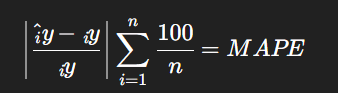

where:

* ( y_i ): actual (true) value
* ( y^_i ): predicted value
* ( n ): number of observations

---

### 🔹 Interpretation

MAPE tells you **how far your predictions deviate from the true values in percentage terms**.
For example, a MAPE of **22.73%** means the model’s predictions are off by about **22.73% on average**.

---

### 🔹 Advantages

✅ **Intuitive and easy to interpret:**
Expressing errors in percentages helps communicate model performance clearly (e.g., “the model has an average error of 22.73%”).

✅ **Scale-independent:**
MAPE can be used to compare models across different datasets or units (e.g., sales in dollars vs. energy in kWh).

---

### 🔹 Limitations

🚫 **Division by zero problem:**
If any true value (( y_i = 0 )), MAPE becomes undefined or extremely large.
Therefore, it should **not** be used with datasets containing zeros or near-zero values.

🚫 **Not suitable for negative targets:**
MAPE assumes that all true values are positive.

---

### 🔹 When to Use MAPE

| Scenario                                    | Use MAPE? |
| ------------------------------------------- | --------- |
| All target values are positive              | ✅ Yes     |
| You need a percentage-based error metric    | ✅ Yes     |
| Dataset contains zeros or very small values | ❌ No      |
| Dataset contains negative values            | ❌ No      |
| Comparing models on different scales        | ✅ Yes     |

In [ ]:
from sklearn import metrics
import numpy as np

y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5.0, 4.0, 8]

# Convert lists to NumPy arrays for element-wise operations
y_true_np = np.array(y_true)
y_pred_np = np.array(y_pred)

MAE = metrics.mean_absolute_error(y_true, y_pred)
MSE = metrics.mean_squared_error(y_true, y_pred)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y_true_np - y_pred_np) / y_true_np)) * 100
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAPE:", MAPE)

MAE: 0.75
MSE: 0.875
RMSE: 0.9354143466934853
MAPE: 22.738095238095234


#**EXAMPLE**

y_true = [1, 0, 1, 0]
 , y_pred = [0.9, 0.2, 0.7, 0.1]. Calculate the BCE quantity.

Definition:
The Binary Cross-Entropy (BCE) — also known as Log Loss — measures the dissimilarity between true binary labels and predicted probabilities in a binary classification problem.
It quantifies how close the predicted probability distributions are to the actual class labels.

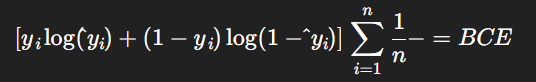

where:

y_i: actual binary label (0 or 1)

y^_i: predicted probability for the positive class

n: number of samples



🔹 Intuition

BCE measures how confident your model is about its predictions:

A perfect prediction (probability = 1 for true class) gives a loss close to 0.

A wrong or uncertain prediction increases the loss significantly.
Thus, the goal of training is to minimize BCE, meaning the model’s predicted probabilities align closely with the true labels.




🔹 Advantages

✅ Works directly with probabilistic outputs, not just class labels.

✅ Penalizes overconfident wrong predictions more heavily.

✅ The most common loss function for binary classifiers such as logistic regression, neural networks, or CNNs in binary tasks.



| Scenario                          | Use BCE?                                     |
| --------------------------------- | -------------------------------------------- |
| Binary classification problem     | ✅ Yes                                        |
| Model outputs probabilities (0–1) | ✅ Yes                                        |
| Multi-class classification        | ❌ No (use categorical cross-entropy instead) |
| Regression tasks                  | ❌ No (use MSE/MAE instead)                   |


In [ ]:
"""
binary_cross_entropy
-----------------------
A simple script to calculate Binary Cross-Entropy (BCE)
for binary classification tasks.
"""

import numpy as np

def binary_cross_entropy(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.clip(np.array(y_pred), 1e-15, 1 - 1e-15)  # Avoid log(0)
    bce = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return bce


if __name__ == "__main__":
    y_true = [1, 0, 1, 0]
    y_pred = [0.9, 0.2, 0.7, 0.1]

    result = binary_cross_entropy(y_true, y_pred)
    print(f"Binary Cross-Entropy (BCE): {result:.4f}")


Binary Cross-Entropy (BCE): 0.1976



```python
y_pred = np.clip(np.array(y_pred), 1e-15, 1 - 1e-15)
```

**Explanation:**

* `np.array(y_pred)` converts the predicted values to a NumPy array.
* `np.clip(x, a, b)` limits (or *clips*) all values in `x` to be within the range `[a, b]`.

  * Any value smaller than `1e-15` (0.000000000000001) becomes `1e-15`.
  * Any value larger than `1 - 1e-15` (0.999999999999999) becomes `1 - 1e-15`.

**Why we do this:**
When calculating binary cross-entropy (BCE), we use logarithms:

log(y_pred)

log(1 - y_pred)


If `y_pred` is exactly `0` or `1`, then we would have:

* `log(0)` → equals **-∞** (undefined, causes an error)
* `log(1)` → equals **0**, which is fine, but `log(1 - 1)` again gives `log(0)` if `y_pred = 1`

So, to **avoid taking the log of zero**, we slightly “push” all predictions away from 0 and 1.
This ensures the BCE loss remains numerically stable and doesn’t produce infinite or NaN values.

👉
**This line prevents mathematical errors (like log(0)) and keeps the loss function stable.**


#**EXAMPLE**
Calculate the multi-class Cross-Entropy quantity for the results shown.
| Sample | y_true | Predicted Probabilities [C1, C2, C3] |
| :----: | :----: | :----------------------------------: |
|    1   |    1   |            [0.7, 0.2, 0.1]           |
|    2   |    2   |            [0.1, 0.6, 0.3]           |
|    3   |    3   |            [0.2, 0.3, 0.5]           |


What is Multi-Class Cross-Entropy (Categorical Cross-Entropy)?

Categorical Cross-Entropy (CCE) — also called Multi-Class Cross-Entropy — is a loss function used in multi-class classification problems where each input sample belongs to one and only one class out of multiple possible classes.

It measures how well the predicted probability distribution (from a model, such as a neural network with a Softmax output) matches the true class labels.

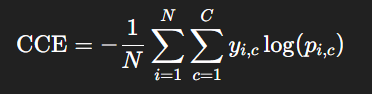


Where:

* ( N ): number of samples
* ( C ): number of classes
* ( y_{i,c} ): true label (1 if sample *i* belongs to class *c*, otherwise 0)
* ( p_{i,c} ): predicted probability that sample *i* belongs to class *c*



### ⚙️ When Do We Use It?

Use **Categorical Cross-Entropy** when:

* You are solving a **multi-class classification** task (e.g., image classification with 10 classes).
* Your model outputs **a probability distribution** (via Softmax) across all classes.
* Each input belongs to **only one class** (not multiple).

If you have **multi-label classification** (samples can belong to several classes at once), use **Binary Cross-Entropy** instead.


### 📊 Intuition

* The loss is **low** when the model assigns **high probability** to the correct class.
* The loss is **high** when the model assigns **low probability** to the correct class.
* The goal during training is to **minimize this loss**, which means improving confidence in correct predictions.


In [ ]:

import numpy as np

def multi_class_cross_entropy(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Clip to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Convert 1-based labels to 0-based if necessary
    if y_true.min() == 1:
        y_true_indexed = y_true - 1
    else:
        y_true_indexed = y_true

    # Select the predicted probability of the true class for each sample
    true_class_probs = y_pred[np.arange(len(y_true)), y_true_indexed]

    # Compute the mean negative log-likelihood
    loss = -np.mean(np.log(true_class_probs))
    return loss

if __name__ == "__main__":
    # Example usage
    y_true = [1, 2, 3]  # true labels (1-based)
    y_pred = [
        [0.7, 0.2, 0.1],
        [0.1, 0.6, 0.3],
        [0.2, 0.3, 0.5],
    ]

    loss_value = multi_class_cross_entropy(y_true, y_pred)
    print(f"Multi-class Cross-Entropy Loss: {loss_value:.4f}")


Multi-class Cross-Entropy Loss: 0.5202


**Use One-Hot Encoding :**

In [ ]:
import numpy as np

def multi_class_cross_entropy_onehot(y_true_onehot, y_pred):

    y_true_onehot = np.array(y_true_onehot)
    y_pred = np.array(y_pred)

    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Cross-Entropy: sum over classes, then mean over samples
    loss_per_sample = -np.sum(y_true_onehot * np.log(y_pred), axis=1)
    loss = np.mean(loss_per_sample)

    return loss

if __name__ == "__main__":

    y_true_onehot = [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]

    y_pred = [
        [0.7, 0.2, 0.1],
        [0.1, 0.6, 0.3],
        [0.2, 0.3, 0.5],
    ]

    loss_value = multi_class_cross_entropy_onehot(y_true_onehot, y_pred)
    print(f"Multi-class Cross-Entropy Loss (One-Hot): {loss_value:.4f}")


Multi-class Cross-Entropy Loss (One-Hot): 0.5202
